In [1]:
# Import all the relevant packages
import numpy as np # for linear algebra
import pandas as pd # for data manipulation and analysis

import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns # for data visualization and plots
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read in each .csv files
df = pd.read_csv('cleaned_social.csv', index_col=0)
df

,Name,Email,Address,reaction,Datetime,Sentiment,Score,Content,Category,Device,Duration,state
0,Richard Smith,RS@gmail.com,"00358 Heather Gardens\nLake Heidiview, OH 42464",disgust,2020-11-07 9:43,negative,0,photo,studying,Motorola,88,OH
1,Myrtis Clark,MC@gmail.com,0574 Elizabeth Road Suite 512\nEast Candicevil...,dislike,2021-06-17 12:22,negative,10,photo,studying,Huawei,11,ND
2,Helen Tuttle,HT@gmail.com,"533 Joseph Isle Suite 449\nWardland, TX 97192",scared,2021-04-18 5:13,negative,15,photo,studying,Motorola,26,TX
3,Racheal Hart,RH@gmail.com,"30254 Gregory Canyon Suite 734\nWest Sarah, MT...",disgust,2021-01-06 19:13,negative,0,photo,studying,Microsoft,96,MT
4,Donna Valdovinos,DV@gmail.com,"0090 Adams Viaduct\nNew Benjamin, VT 75869",interested,2020-08-23 12:25,positive,30,photo,studying,HTC,19,VT
...,...,...,...,...,...,...,...,...,...,...,...,...
22529,Michelle Limerick,ML@gmail.com,"3817 Brittany Knoll Suite 377\nDanieltown, NY ...",worried,2020-10-31 4:50,negative,12,audio,technology,Google,95,NY
22530,Joyce Batts,JB@gmail.com,"318 Sandra Circle Suite 396\nStevensport, SD 7...",dislike,2020-06-27 9:46,negative,10,audio,technology,Google,39,SD
22531,Hazel Neville,HN@gmail.com,"42350 Wilson Turnpike Suite 472\nMendezmouth, ...",intrigued,2021-02-16 17:17,positive,45,audio,technology,Apple,90,VT
22532,Ruth Nemoede,RN@gmail.com,"PSC 9038, Box 4090\nAPO AP 52456",worried,2020-11-04 20:08,negative,12,audio,technology,Huawei,98,AP


In [3]:
df['Name'].value_counts()

Gabriel Chauvin    65
Harold Holbert     65
Jose Pankratz      63
Noah Guilliam      62
Wallace Nyberg     62
                   ..
Cordelia Reny      31
Benny Addison      30
Elva Norris        30
John Bayly         30
Sally Phillips     29
Name: Name, Length: 500, dtype: int64

We see that there are 500 unique users

In [4]:
df['Content'].value_counts()

photo    6043
video    5728
GIF      5578
audio    5185
Name: Content, dtype: int64

In [5]:
df['Category'].value_counts()

animals            1738
science            1646
healthy eating     1572
technology         1557
food               1556
culture            1538
cooking            1525
travel             1510
soccer             1339
education          1311
Fitness            1284
studying           1251
dogs               1227
tennis             1218
veganism           1146
public speaking    1116
Name: Category, dtype: int64

In [6]:
df['Device'].value_counts()

Motorola     3470
Microsoft    3432
Huawei       3325
HTC          3215
Apple        3079
Samsung      2951
Google       2786
Unknown       276
Name: Device, dtype: int64

In [7]:
df['reaction'].value_counts()

heart          1497
peeking        1438
scared         1436
adore          1427
interested     1425
hate           1420
love           1411
disgust        1406
dislike        1396
want           1396
super love     1393
like           1391
indifferent    1385
cherish        1380
worried        1379
intrigued      1354
Name: reaction, dtype: int64

In [8]:
df['Sentiment'].value_counts()

positive    12674
negative     7037
neutral      2823
Name: Sentiment, dtype: int64

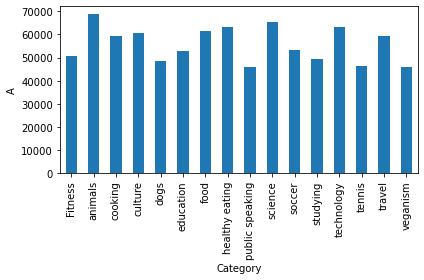

In [10]:
df['Datetime'] = pd.to_datetime(df['Datetime'])
df['Month'] = df['Datetime'].dt.month
df

,Name,Email,Address,reaction,Datetime,Sentiment,Score,Content,Category,Device,Duration,state,Month
0,Richard Smith,RS@gmail.com,"00358 Heather Gardens\nLake Heidiview, OH 42464",disgust,2020-11-07 09:43:00,negative,0,photo,studying,Motorola,88,OH,11
1,Myrtis Clark,MC@gmail.com,0574 Elizabeth Road Suite 512\nEast Candicevil...,dislike,2021-06-17 12:22:00,negative,10,photo,studying,Huawei,11,ND,6
2,Helen Tuttle,HT@gmail.com,"533 Joseph Isle Suite 449\nWardland, TX 97192",scared,2021-04-18 05:13:00,negative,15,photo,studying,Motorola,26,TX,4
3,Racheal Hart,RH@gmail.com,"30254 Gregory Canyon Suite 734\nWest Sarah, MT...",disgust,2021-01-06 19:13:00,negative,0,photo,studying,Microsoft,96,MT,1
4,Donna Valdovinos,DV@gmail.com,"0090 Adams Viaduct\nNew Benjamin, VT 75869",interested,2020-08-23 12:25:00,positive,30,photo,studying,HTC,19,VT,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22529,Michelle Limerick,ML@gmail.com,"3817 Brittany Knoll Suite 377\nDanieltown, NY ...",worried,2020-10-31 04:50:00,negative,12,audio,technology,Google,95,NY,10
22530,Joyce Batts,JB@gmail.com,"318 Sandra Circle Suite 396\nStevensport, SD 7...",dislike,2020-06-27 09:46:00,negative,10,audio,technology,Google,39,SD,6
22531,Hazel Neville,HN@gmail.com,"42350 Wilson Turnpike Suite 472\nMendezmouth, ...",intrigued,2021-02-16 17:17:00,positive,45,audio,technology,Apple,90,VT,2
22532,Ruth Nemoede,RN@gmail.com,"PSC 9038, Box 4090\nAPO AP 52456",worried,2020-11-04 20:08:00,negative,12,audio,technology,Huawei,98,AP,11


In [13]:
df.groupby(['Datetime', 'Category']).sum().reset_index()

,Datetime,Category,Score,Duration,Month
0,2020-06-18 08:07:00,cooking,5,40,6
1,2020-06-18 08:51:00,cooking,45,0,6
2,2020-06-18 09:13:00,studying,15,53,6
3,2020-06-18 10:37:00,food,72,36,6
4,2020-06-18 11:34:00,tennis,70,19,6
...,...,...,...,...,...
22502,2021-06-18 07:41:00,travel,0,72,6
22503,2021-06-18 07:44:00,cooking,50,17,6
22504,2021-06-18 07:52:00,animals,35,22,6
22505,2021-06-18 08:01:00,healthy eating,12,12,6


In [16]:
df.groupby(['Datetime', 'Category']).sum().reset_index().set_index('Datetime')

,Category,Score,Duration,Month
Datetime,,,,
2020-06-18 08:07:00,cooking,5,40,6
2020-06-18 08:51:00,cooking,45,0,6
2020-06-18 09:13:00,studying,15,53,6
2020-06-18 10:37:00,food,72,36,6
2020-06-18 11:34:00,tennis,70,19,6
...,...,...,...,...
2021-06-18 07:41:00,travel,0,72,6
2021-06-18 07:44:00,cooking,50,17,6
2021-06-18 07:52:00,animals,35,22,6


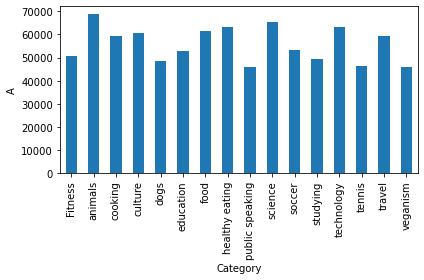

In [14]:
plt.figure()
df.groupby(['Category'])['Score'].sum().plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('A')
plt.title('')
plt.tight_layout()
plt.show()

In [ ]:
# visualize the columns:
plt.figure(figsize=(10,8))
sns.countplot(x ='Category', hue = "Content", palette='plasma', data = df)
plt.xlabel('Categories with Sentiments')
plt.xticks(rotation = 45)
plt.ylabel('Categories')
plt.tight_layout()
plt.title('Sentiments of each category')

plt.show()

In [ ]:
df.info()